# Oceanography Python Tutorial

## Exercice 1. Reading data using xarray

Let's import xarray and read our data :)

In [13]:
import xarray as xr
data = xr.open_dataset("EA_R12_test10_1m_20130201_20131231_grid_T_extracted.nc")


## Exercice 3. Manipulate the DataFrame
- plot the average temperature for each time_counter at a global level
- plot the average temperature for each time_counter and each depth

In [ ]:
da

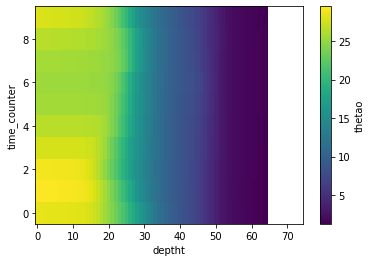

In [80]:
(data
 .where((data.thetao != 0) & (data.thetao != 1e20))
 .mean(['y', 'x'])
 .thetao
 .plot())

## Exercice 2. Transform xarray into a pandas dataframe

In [72]:
(data
 .where((data.thetao != 0) & (data.thetao != 1e20))
 .mean(['x', 'y',]))

<xarray.Dataset>
Dimensions:  (deptht: 75, time_counter: 10)
Dimensions without coordinates: deptht, time_counter
Data variables:
    nav_lat  (time_counter, deptht) float32 -5.68 -5.68 -5.68 ... -1.0 -1.0 -1.0
    nav_lon  (time_counter, deptht) float32 34.47 34.47 34.47 ... -1.0 -1.0 -1.0
    so       (time_counter, deptht) float32 35.27 35.27 35.27 ... nan nan nan
    thetao   (time_counter, deptht) float32 28.45 28.42 28.4 ... nan nan nan

In [24]:
df = data.to_dataframe()

In [55]:
data.thetao.max()

<xarray.DataArray 'thetao' ()>
array(30.7310524)

In [27]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline


In [30]:
data.isel

<bound method Dataset.isel of <xarray.Dataset>
Dimensions:  (deptht: 75, time_counter: 10, x: 57, y: 124)
Dimensions without coordinates: deptht, time_counter, x, y
Data variables:
    nav_lat  (y, x) float32 -11.51 -11.51 -11.51 -11.51 ... -1.333 -1.333 -1.333
    nav_lon  (y, x) float32 38.42 38.5 38.58 38.67 ... 42.83 42.92 43.0 43.08
    so       (time_counter, deptht, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
    thetao   (time_counter, deptht, y, x) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes: (12/14)
    name:         EA_R12_test10_1m_20130201_20131231_grid_T
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.6
    timeStamp:    2021-Jul-16 12:28:33 GMT
    uuid:         2f0382ff-8214-4f68-8052-821fe8d9b7bf
    ...           ...
    jbegin:       0
    nj:           31
    file_name:    /work/n01/n01/valegu/EA_R12/nemo_v4.06/cfgs/EAFRICA/EXP_R12...
    TimeStamp:    19/07/2021 12:19:25 +0100
    history:      Mon Jul 19 14

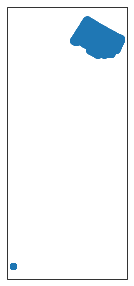

In [36]:
proj = ccrs.LambertConformal(central_longitude=40, central_latitude=-10)
fig = plt.figure(figsize=(15, 5))
ax = plt.axes(projection=proj)
data.plot.scatter(x='nav_lat', y='nav_lon', colors='thetao', transform=ccrs.PlateCarree())
